1. (Visualisation, 1.5 mark) Using scipy.stats’s rvs method, sample 30 tuples (x
1
i
, x2
i
, x3
i
, x4
i
)1≤i≤30
s.th.
x
1
i ∼ Normal(0, 1)
x
2
i ∼ Normal(2, 4)
x
3
i ∼ Uniform(0, 1)
x
4
i = x
3
i
· z where z ∼ Uniform(0, 1)
Using one of the visualisation techniques discussed in the lectures, plot this 4-D data. (Hint: you may
find that you need to adjust some parameter(s) for your plot to be legible; if so please do it.). The four
dimensions are not all independent of one another. How does this manifest itself on your plot?

In [58]:
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import cauchy
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np 
from scipy.signal import convolve
from scipy.integrate import quad
%matplotlib inline

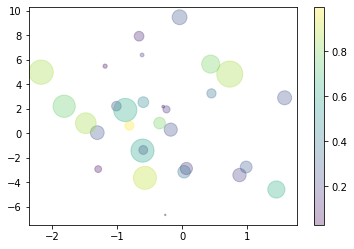

In [59]:
#getting 30 samples
x1 = norm.rvs(loc=0, scale=1, size=30)
x2 = norm.rvs(loc=2, scale=4, size=30)
x3 = uniform.rvs(loc=0, scale=1, size=30)
z = uniform.rvs(loc=0, scale=1, size=30)
x4 = x3*z

#plotting bubbleplot with the respective samples
plt.scatter(x1, x2, c=x3, s=x4*1000, alpha=0.3)
plt.colorbar()

2. (Visualisation, 1.5 mark) Display a QQ plot for the following probability measures: the standard normal
Normal(0, 1) on the x-axis and the standard Cauchy distribution Cauchy(0, 1) on the y-axis. What does
the QQ plot tell us about the tails of these distributions?

**Ans:** We observe that the tails are fatter in the QQ plot meaning that the data is too peaked at the center making the distribution more narrow than the normal distribution.

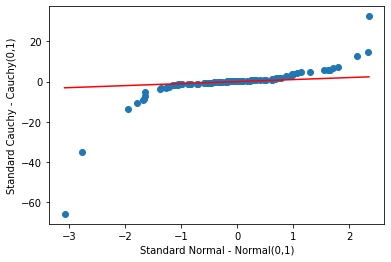

In [71]:
#sampling from normal and cauchy distributions
standard_normal = norm.rvs(loc=0, scale=1, size=100)
standard_cauchy = cauchy.rvs(loc=0, scale=1, size=100)

#calculating percentiles for each distribution
p = np.linspace(0,100,100)
x = np.percentile(standard_normal, p)
y = np.percentile(standard_cauchy, p)

#plotting the QQ plot
plt.plot(x,y, 'o')
plt.plot(x,x, color='red')
plt.xlabel('Standard Normal - Normal(0,1)')
plt.ylabel('Standard Cauchy - Cauchy(0,1)')
plt.show()

3. (Independent sum of two probability measures, 3 marks) Recall from the lectures that if we have
two probability measures P1 and P2 with respective densities f1 and f2, then the density of the sum1
P1 + P2 is given by the convolution of the two densities, viz.
f1+2(t) = Z ∞
−∞
f1(x)f2(t − x) dx.

In this question we consider the sum of Beta (2, 8) + Beta (8, 2). What is the support of Beta (2, 8)? What
is the support of Beta (8, 2)? Therefore, what is the support of Beta (2, 8) + Beta (8, 2)?

**Ans:** The Support of Beta(2,8) and Beta(8,2) is [0,1] since this is where the distribution is defined. But to find the support of Beta(2,8)+Beta(8,2) we need to find the convolution of these 2 distributions, this is shown by the following code. Therefore, the support of Beta(2,8)+Beta(8,2) is [0.5,2.5].

Lower limit:  0.5010010010010011
Upper limit:  2.494994994994995


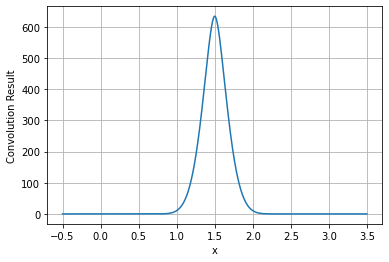

In [61]:
#creating a range of values
x = np.linspace(-0.5, 3.5, 1000)

# defining the PDFs of the two beta distributions
pdf1 = beta.pdf(x, 2, 8)
pdf2 = beta.pdf(x, 8, 2)

#convolution of the PDFs
convolution_result = convolve(pdf1, pdf2,mode='full')

#finding the indices where the convolution is greater than 0
non_zero_indices = np.where(convolution_result > 0)

#getting the corresponding values from the range of values (i.e. x)
final_convolution_result = []
non_zero_values = []
for i,k in enumerate(non_zero_indices[0]):
    if k < 1000:
        non_zero_values.append(x[k])

for i in range(1000):
    c = convolution_result[i]
    final_convolution_result.append(c)

#finding the support of the new distribution
print("Lower limit: ",min(non_zero_values))
print("Upper limit: ",max(non_zero_values))

#plotting the convolution result
plt.plot(x,final_convolution_result, label='Convolution')
plt.xlabel('x')
plt.ylabel('Convolution Result')
plt.grid(True)
plt.show()

Write a function which implements the integrand of the integral above, that is to say that implements
f1(x)f2(t−x), where f1 is the density of Beta (2, 8) and f2 is the density of Beta (8, 2). (Hint: this function
will need two arguments.)

In [62]:
#lamba function to find the product of the densities of the beta distributions
integrand_of_integral = lambda x, t: beta.pdf(x, 2, 8)*beta.pdf(t - x, 8, 2)

Next, generate 100 points (t1, . . . , t100) along the support of Beta (2, 8) + Beta (8, 2) (using numpy’s
linspace function), and using a for loop, compute the pdf f1+2(ti) at these 100 points using quad.
(Hint: the documentation of quad has an example showing how to integrate a function with two arguments
along its first argument.) Plot your result.

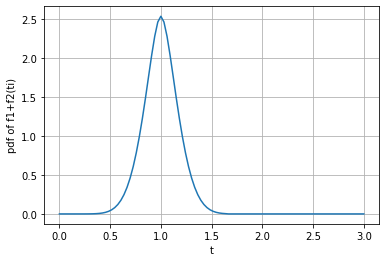

In [63]:
#creating range of values along the support
t = np.linspace(0, 3, 100)

#computing pdf of each value
result = []
for i,k in enumerate(t):
    res, err = quad(integrand_of_integral, float('-inf'), float('inf'), args=(k,))
    result.append(res)

#plotting the pdf values
plt.plot(t,result)
plt.xlabel('t')
plt.ylabel('pdf of f1+f2(ti)')
plt.grid(True)
plt.show()

Finally, generate 10000 samples from Beta (2, 8), 10000 samples from Beta (8, 2), add them, and plot the
histogram of these sums along with the pdf computed in the previous step. What do you observe?

**Ans:** We can observe that the plot of 10000 samples taken and combined from the two beta distributions shows a normal distribution that is centering around the true mean, this is due to the Central Limit Theorem (CLT). Moreover, when adding the large number of samples from both the distributions we can see that the sample mean is converging to the true mean of the combined distribution due to the Law of Large Numbers. On the otherhand, the pdf plotted of the combined distribution shows a pdf that is centered around the true mean of the combined distribution which is again been guided by the CLT and Law of Large Numbers.

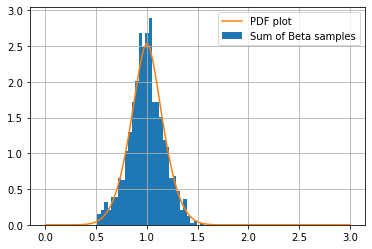

In [64]:
#Sampling from Beta distributions
beta_2_8_samples = beta.rvs(2,8, size=1000)
beta_8_2_samples = beta.rvs(8,2, size=1000)

#Adding the beta samples
beta_plus = beta_2_8_samples + beta_8_2_samples

#plotting the summation of beta samples and the pdf of the combined distribution
plt.hist(beta_plus, int(np.sqrt(1000)), density = True, label='Sum of Beta samples')
plt.plot(t,result, label='PDF plot')
plt.legend()
plt.grid(True)
plt.show()

4. (Sample mean process and sample mean distribution, 4 marks)

• Write a function called sample_mean taking as inputs two integers m and n. The function should
return an array of length n containing samples each obtained by taking m samples from the standard normal distribution and computing their sample mean. Call sample_mean(m=10, n=10000),
sample_mean(m=100, n=10000) , and sample_mean(m=1000, n=10000) and plot a histogram for
each of these outputs.

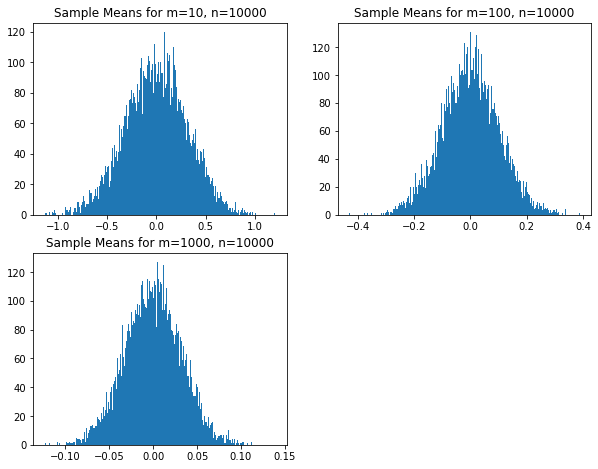

In [73]:
#computing n number of sample means for different m number of samples
def sample_mean(m, n):
    samples = np.random.normal(0, 1, size=(n, m))
        
    sample_means = []
    for i,k in enumerate(samples):
        sample_means.append(np.mean(k))
    
    return sample_means

# Calling the function with different values of m and n
sample_means_10 = sample_mean(10, 10000)
sample_means_100 = sample_mean(100, 10000)
sample_means_1000 = sample_mean(1000, 10000)

# Plotting histograms of the sample means
plt.figure(figsize=(10,12))

plt.subplot(3,2,1)
plt.hist(sample_means_10, bins=300)
plt.title('Sample Means for m=10, n=10000')

plt.subplot(3,2,2)
plt.hist(sample_means_100, bins=300)
plt.title('Sample Means for m=100, n=10000')

plt.subplot(3,2,3)
plt.hist(sample_means_1000, bins=300)
plt.title('Sample Means for m=1000, n=10000')

plt.show()


• By solving the first question of the Theory part, write a class called sample_mean_distribution
whose constructor takes an integer m as input and implements the probability measure
Normal(0, 1)m ≜
1
m
Xm
i=1
Normal(0, 1)
in other words, the distribution of the length-m estimator of the mean. Instantiate the objects
sample_mean_distribution(10), sample_mean_distribution(100), sample_mean_distribution(1000)
and plot their PDFs

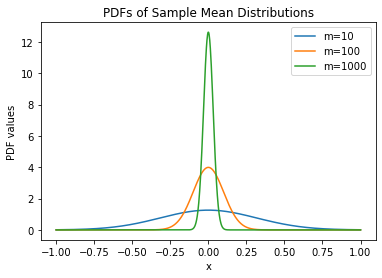

In [66]:
#Creating a class for sample mean distribution
class sample_mean_distribution:
    def __init__(self, m):
        self.m = m
        
# Calculate the PDF of the length-m estimator of the mean
    def calculate_pdf(self, x):
        return norm.pdf(x, loc=0, scale=1/np.sqrt(self.m))

# Instantiating the objects with different values of m
sample_mean_distribution_10 = sample_mean_distribution(10)
sample_mean_distribution_100 = sample_mean_distribution(100)
sample_mean_distribution_1000 = sample_mean_distribution(1000)

# Generating values for the PDF plot
x = np.linspace(-1, 1, 1000)

# Calculating the PDFs for the three distributions
pdf_10 = []
pdf_100 = []
pdf_1000 = []

for i,k in enumerate(x):
    pdf_10.append(sample_mean_distribution_10.calculate_pdf(k))
    pdf_100.append(sample_mean_distribution_100.calculate_pdf(k))
    pdf_1000.append(sample_mean_distribution_1000.calculate_pdf(k))

# Plotting the PDFs
plt.plot(x, pdf_10, label='m=10')
plt.plot(x, pdf_100, label='m=100')
plt.plot(x, pdf_1000, label='m=1000')
plt.xlabel('x')
plt.ylabel('PDF values')
plt.title('PDFs of Sample Mean Distributions')
plt.legend()
plt.show()


Compare (a) the 3 histograms, (b) the 3 PDFs and (c) the histograms with the PDF. What conclusions
do you draw?

**Answer**

a) The three histograms show that as the sample size increases they become more normally distributed, therefore following the Central Limit Theorem. 

b) The three PDF plots show that with the increase in the number of random variables (i.e. variable m) the distribution of the sample mean proceeds towards a normal distribution, thereby centering around the true mean of 0 with its decreasing standard deviation. This is due to the result of the Central Limit Theorem. This is also the result of Law of Large numbers since the sample mean is approaching closely towards the true mean.

c) Both the histogram and the pdf plot follow the similar normal distribution since the histogram achieved its normal distribution by adding large number of samples together while the pdf plot shows a pdf that is centered around the true mean. These results are due to the Central Limit Theorem and the Law of Large Numbers.